In [1]:
library(Seurat)
library(data.table)
library(ggplot2)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3


In [2]:
datasetName = '/stor/public/hcad/heart_heart_Hua2020/heart_heart_Hua2020'

# organization

In [3]:
#load data
data.matrix <- readRDS("/stor/public/chenyx/THU_Heart/Donor1.count.rds")
metadata <-readRDS("/stor/public/chenyx/THU_Heart/Donor1.metadata.rds")

In [4]:
data.meta <- metadata
data.meta$organ <- 'Heart'
data.meta$region <- data.meta$Anatomical.Region.Level1
r <- as.character(metadata$Anatomical.Region.Level2)
sr <- r
sr[r=='LA'] <- "Left Atria"
r[r=='LA'] <- "Atria"
sr[r=='LV'] <- "Left Ventricle"
r[r=='LV'] <- "Ventricle"
data.meta$region <- r
data.meta$subregion <- sr
data.meta$sample_status <- 'Healthy'
data.meta$donor_ID <- 'Hua2020 Donor1'
data.meta$donor_gender <- 'Male'
data.meta$donor_age <- 42
data.meta$Protocol <- '10X'
data.meta$sample_ID <- paste('Hua2020 Donor1', lapply(rownames(data.meta),function(x) strsplit(x,'[.]')[[1]][1]))

In [5]:
data.meta <- data.meta[,!names(data.meta) %in% c('Anatomical.Region.Level1','Anatomical.Region.Level2','Anatomical.Region.Level3')]

# Analysis

In [7]:
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, meta.data = data.meta, min.cells = 3,min.features = 200)

In [8]:
dataobj

An object of class Seurat 
27056 features across 85484 samples within 1 assay 
Active assay: RNA (27056 features)

# Normalization

In [9]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


# PCA

In [10]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  NEGR1, MECOM, ADGRB3, ACSM3, FBN1, CDH19, ABI3BP, NCAM2, TMEM132C, COL4A4 
	   TSHZ2, LDB2, CALCRL, COL8A1, ROBO1, CFH, FAM65C, AKAP12, CPM, EPAS1 
	   C7, FLT1, ABCA9, MUSK, ENG, ST6GALNAC3, MGLL, NOX4, CLMN, PELI2 
Negative:  CKMT2, B4GALNT3, MIR1-1HG, ANKRD1, SPHKAP, FHOD3, TMEM178B, MYO18B, FSD2, TECRL 
	   MYOZ2, WNK2, TENM2, PACRG, ACTN2, SGCG, NDRG4, LRRC39, MYPN, KCND3 
	   TXLNB, CMYA5, ESRRG, PPARGC1A, DPY19L2, TRDN, CDH2, HOMER1, LMOD2, CCSER1 
PC_ 2 
Positive:  VWF, ST6GALNAC3, ANO2, PTPRB, SHANK3, MCF2L, F8, LNX1, TPO, EMCN 
	   PECAM1, FLT1, BTNL9, CYYR1, ST8SIA6, CCDC85A, NOVA2, ERG, PLEKHG1, NOTCH4 
	   ADGRF5, SULF2, RASGRF2, CPAMD8, ADGRL4, NEDD9, PPP1R16B, RNF125, CXorf36, RGCC 
Negative:  NEGR1, CDH19, ABI3BP, ACSM3, ADGRB3, NCAM2, COL4A4, MUSK, ABCA9, FBN1 
	   ROBO1, C7, CFH, NOX4, MGST1, PCDH9, ANKS1B, COL8A1, LTBP1, SVEP1 
	   TMEM108, TMEM132C, ADH1B, KCNT2, ADGRL3, ADAMTS5, ANGPT1, AOX1, PAPPA, COL6A6 
PC_ 3 
Positive:  CHN2, FHL2, WBSCR17, R

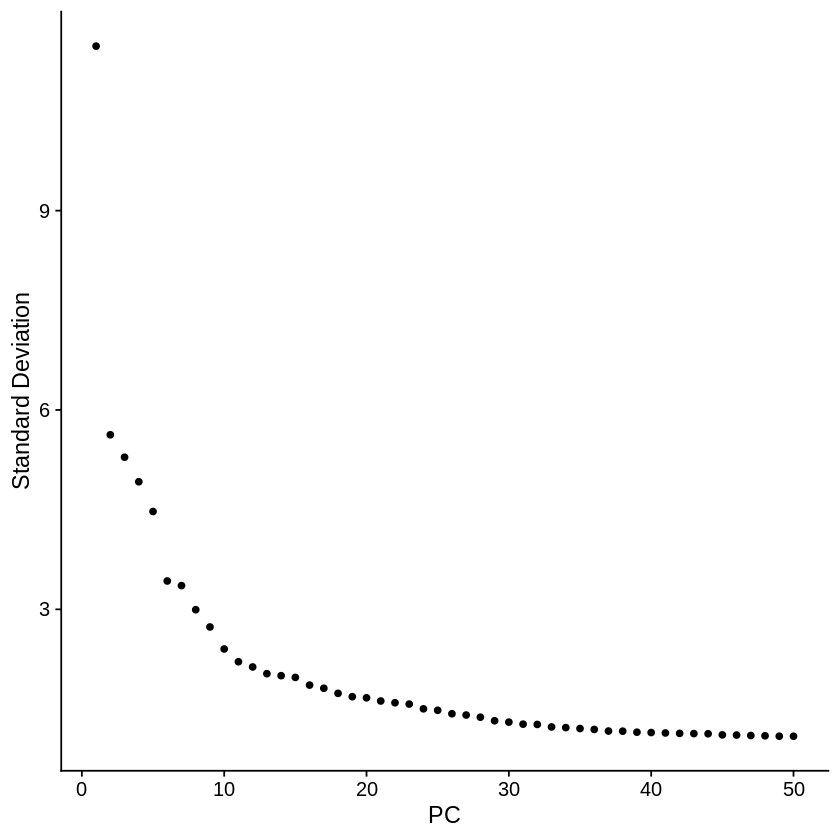

In [14]:
ElbowPlot(dataobj,50)
# select 30

In [11]:
# run Umap
dataobj <- RunUMAP(dataobj, dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”20:31:14 UMAP embedding parameters a = 0.9922 b = 1.112
20:31:14 Read 85484 rows and found 30 numeric columns
20:31:14 Using Annoy for neighbor search, n_neighbors = 30
20:31:14 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
20:31:31 Writing NN index file to temp file /tmp/RtmpadizBV/file6c3f91e091
20:31:31 Searching Annoy index using 1 thread, search_k = 3000
20:32:04 Annoy recall = 100%
20:32:04 Commencing smooth kNN distance calibration using 1 thread
20:32:09 Initializing from normalized Laplacian + noise
20:32:32 Commencing optimization

Warning message in if (label) {:
“the condition has length > 1 and only the first element will be used”Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

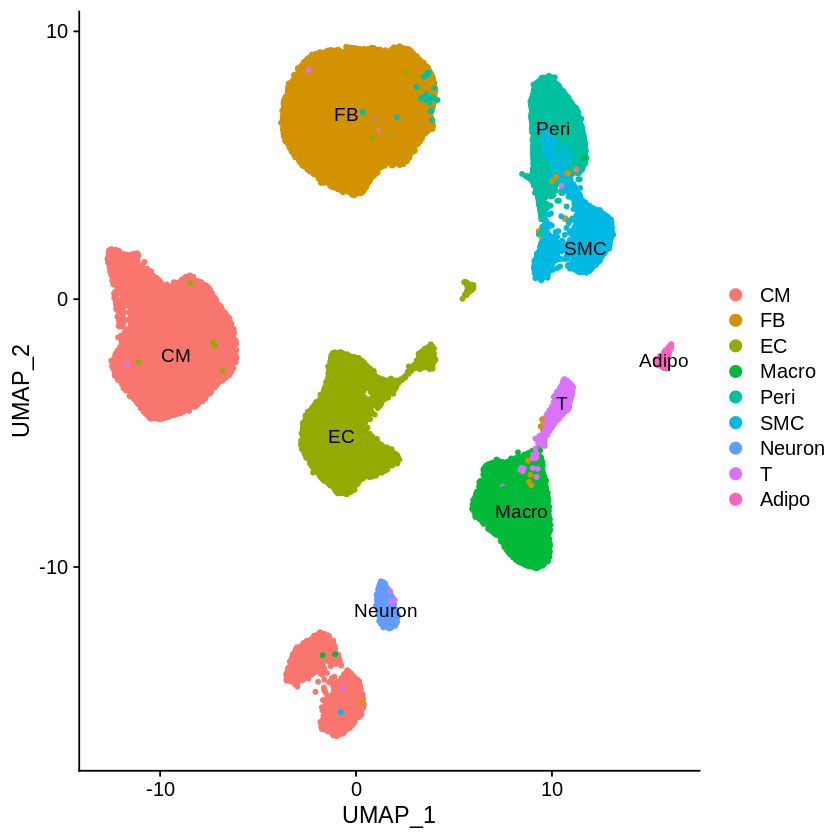

In [12]:
p_umap <- DimPlot(dataobj, reduction = "umap", group.by = 'cell.type',label = dataobj$orig.ident, pt.size=1)
p_umap

In [13]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap, width = 8, height = 5)

# Clustering

In [14]:
dataobj <- FindNeighbors(dataobj, dims = 1:30, k.param = 30)

Computing nearest neighbor graph
Computing SNN


In [15]:
dataobj <- FindClusters(dataobj, resolution = 0.3)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 85484
Number of edges: 4988632

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9548
Number of communities: 15
Elapsed time: 54 seconds


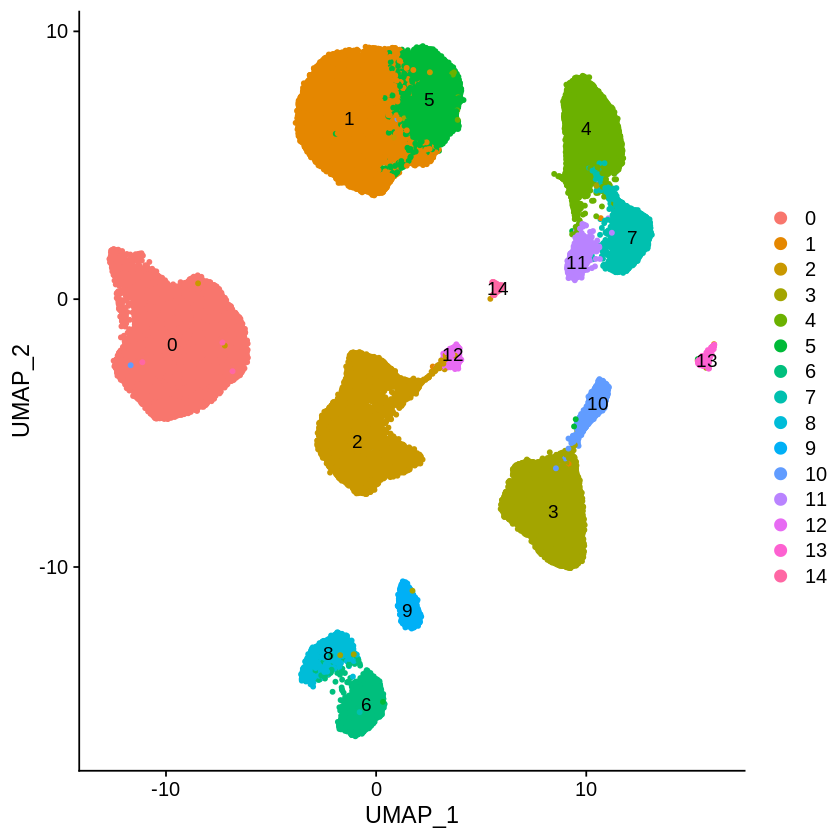

In [16]:
p_umap2 <-DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size=1)
p_umap2

In [17]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap2, width = 8, height = 5)

In [ ]:
dataobj.markers <- FindAllMarkers(dataobj,  test.use='wilcox', min.pct=0.2, thresh.use=0.2, min.diff.pct=0.1, only.positive=TRUE, return.thresh=0.05)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3


In [20]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

In [18]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

# Annotation

In [70]:
dataobj.markers[dataobj.markers['cluster']==14,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
PKHD1L1.1,0,3.3019543,0.997,0.032,0,14,PKHD1L1
MMRN1,0,2.6780936,0.825,0.006,0,14,MMRN1
GPM6A,0,2.6233758,0.815,0.018,0,14,GPM6A
RP11-554D15.1,0,2.2480465,0.428,0.019,0,14,RP11-554D15.1
VAV3.2,0,2.0605636,0.832,0.097,0,14,VAV3
TBX1,0,2.0487227,0.705,0.009,0,14,TBX1
SNTG2.2,0,1.9533714,0.719,0.063,0,14,SNTG2
RELN,0,1.9422118,0.462,0.017,0,14,RELN
CHST15.3,0,1.8035222,0.709,0.056,0,14,CHST15


In [81]:
dataobj.markers[dataobj.markers['gene']=='EMCN',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
EMCN,0.000000e+00,1.9031719,0.591,0.037,0.000000e+00,2,EMCN
EMCN.1,0.000000e+00,2.1129773,0.861,0.099,0.000000e+00,12,EMCN
EMCN.2,5.507594e-55,0.5230379,0.397,0.104,1.490135e-50,14,EMCN


In [4]:
new.cluster.ids <- c('Heart-Musle Tissue-Cardiomyocyte Cell-MYH7',# 0
                     'Heart-Connective Tissue-Fibrocyte-DCN',
                     'Heart-Epithelial Tissue-Endocardial cell-EMCN',
                     'Heart-Connective Tissue-Macrophage-VSIG4',
                     'Heart-Connective Tissue-Pericyte-EGFLAM',
                     'Heart-Connective Tissue-Fibrocyte-CFH',#5
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL7',
                     'Heart-Musle Tissue-Smooth muscle cell-ACTA2',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL4',
                     'Heart-Nerve Tissue-Neuron-NRXN1',
                     'Heart-Connective Tissue-T cell-CD96',#10
                     'Heart-Musle Tissue-Smooth muscle cell-ACTA2',
                     'Heart-Epithelial Tissue-Endocardial cell-EMCN',
                     'Heart-Connective Tissue-Adipocyte-FASN',
                     'Heart-Epithelial Tissue-Endocardial cell-EMCN'
                     )

Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

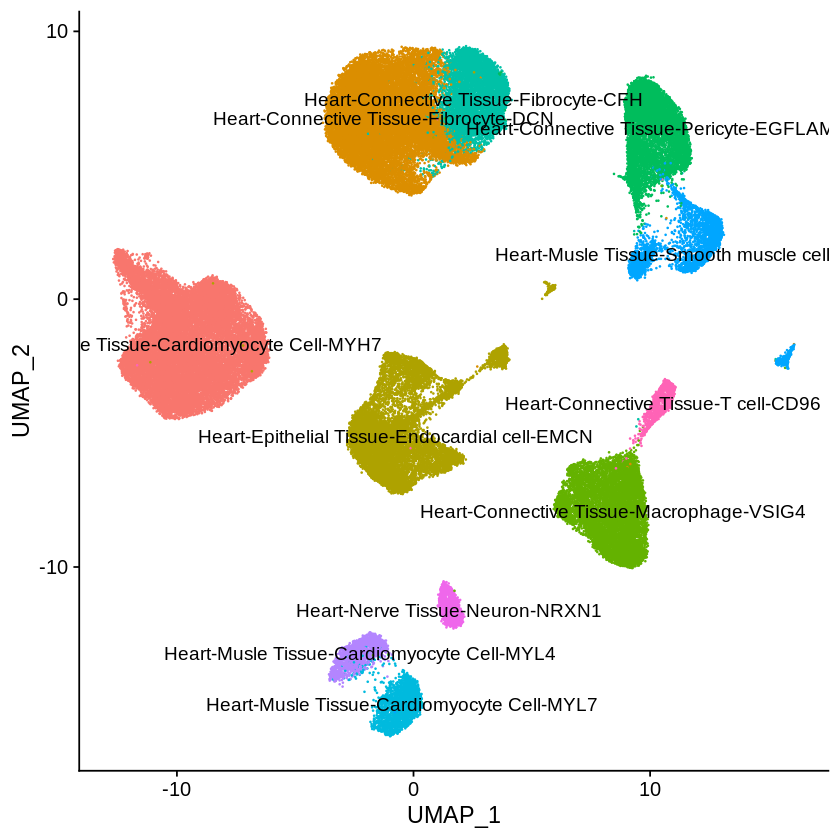

In [5]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 0.1) + NoLegend()
plot

In [84]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [6]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [7]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [8]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [9]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

In [85]:
dataobj@meta.data$Seurat_annotation <- Idents(dataobj)